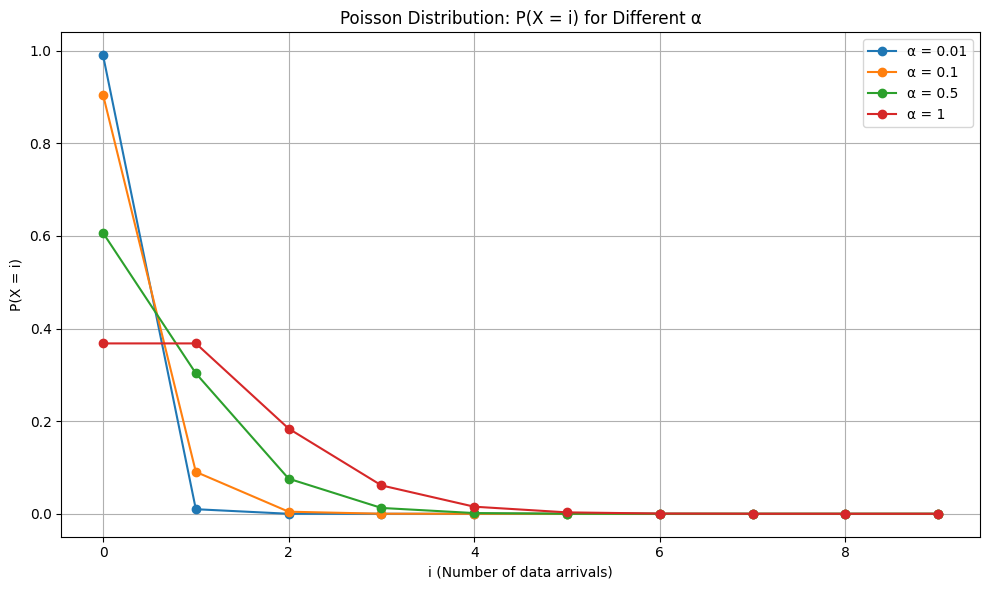

In [13]:
# Task 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define values for alpha and range for X (i)
alpha_values = [0.01, 0.1, 0.5, 1]
i_values = np.arange(0, 10)

plt.figure(figsize=(10, 6))

# Plot Poisson PMF for each alpha
for alpha in alpha_values:
    lam = alpha
    pmf_values = poisson.pmf(i_values, mu=lam)
    plt.plot(i_values, pmf_values, marker='o', label=f'α = {alpha}')

plt.title('Poisson Distribution: P(X = i) for Different α')
plt.xlabel('i (Number of data arrivals)')
plt.ylabel('P(X = i)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
#task 2

# Parameters
alpha = 0.5      
delta_t = 1      
lam = alpha * delta_t
num_samples = 100  

# Sample data arrivals from Poisson distribution
samples = np.random.poisson(lam=lam, size=num_samples)

print(samples)


[0 0 1 0 0 2 0 0 1 0 0 0 0 0 1 1 0 0 2 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 2 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 2 0 0 1 2 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0]


In [15]:
#task 3
def simulate_queue(lmbda, process_time, time_steps=2000):
    queue = []
    waiting_lengths = []

    for t in range(time_steps):
        incoming = np.random.poisson(lmbda)                  # 1. Incoming jobs sampled from Poisson
        queue.extend([process_time] * incoming)              # 2. Each job needs `process_time` steps

        if queue:
            queue[0] -= 1                                    # 3. Decrement the processing time of the current job
            if queue[0] <= 0:
                queue.pop(0)                                 # 4. Remove job if finished

        waiting_lengths.append(len(queue))                   # 5. Record queue length

    return np.mean(waiting_lengths)
avg_wait_length = simulate_queue(0.1, 4)
print(f"Average waiting list length (λ=0.1, processing=4): {avg_wait_length:.2f}")

Average waiting list length (λ=0.1, processing=4): 0.40


In [16]:
#task 4
def run_experiments(lambdas, process_time, time_steps=2000, num_samples=200):
    avg_lengths = []

    for lmbda in lambdas:
        all_runs = [simulate_queue(lmbda, process_time, time_steps) for _ in range(num_samples)]
        avg_over_runs = np.mean(all_runs)
        avg_lengths.append(avg_over_runs)
    return avg_lengths

# Define λ range from 0 to 0.25 in steps of 0.005
lambdas = np.arange(0, 0.255, 0.005)
process_time = 4
num_samples = 200

# Run the simulation
average_lengths = run_experiments(lambdas, process_time, num_samples=num_samples)

# Plotting the result
plt.figure(figsize=(10, 5))
plt.plot(lambdas, average_lengths, marker='o', linestyle='-', color='')
plt.title("Average Waiting List Length vs Arrival Rate λ")
plt.xlabel("Arrival Rate λ")
plt.ylabel("Average Waiting List Length")
plt.grid(True)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

## System Behavior Based on Arrival Rate (λ)

### Low Arrival Rate (λ < 0.1)

- Data arrives slowly.
- The system has more than enough capacity to handle jobs.
- The queue is mostly empty → average waiting list is near 0.

### Moderate Arrival Rate (λ ~ 0.15)

- Jobs start arriving more frequently.
- Queue begins to grow slightly, but the system still manages.

### High Arrival Rate (λ → 0.25)

- This approaches the maximum capacity of the server.
- **Note:** If each job takes 4 steps, the server can only process **0.25 jobs per step**.
- Beyond this point, the server can't keep up, so jobs pile up.
- The queue grows rapidly → exponential growth in the waiting list.


In [ ]:
# task 5
# Run for process time = 4
avg_lengths_4 = run_experiments(lambdas, process_time=4, num_samples=num_samples)

# Run for process time = 2
avg_lengths_2 = run_experiments(lambdas, process_time=2, num_samples=num_samples)

# Plot both for comparison
plt.figure(figsize=(10, 5))
plt.plot(lambdas, avg_lengths_4, marker='o', linestyle='-', color='green', label='Process Time = 4')
plt.plot(lambdas, avg_lengths_2, marker='o', linestyle='-', color='orange', label='Process Time = 2')
plt.title("Average Waiting List Length vs Arrival Rate λ")
plt.xlabel("Arrival Rate λ")
plt.ylabel("Average Waiting List Length")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

## Comparison of Queue Behavior for Different Process Times

###  Key Differences

1. **System Capacity Threshold**:
   - With **Process Time = 4**, the system hits its maximum capacity at **λ = 0.25**, leading to an **exponential growth** in the queue length.
   - With **Process Time = 2**, the server can handle up to **λ = 0.5**, so the queue remains **stable and short** throughout the tested range (λ ≤ 0.25).

2. **Queue Growth Behavior**:
   - For **Process Time = 4**, as λ increases past ~0.20, the queue length starts growing **rapidly**, reaching over **12 jobs on average** at λ = 0.25.
   - For **Process Time = 2**, even at the highest λ tested (0.25), the average queue length stays **well below 1**, indicating a highly efficient and stable system.

###  Conclusion

- **Faster processing** (2 steps/job) provides significantly better queue control and system throughput.
- The graph clearly illustrates the importance of **processing speed** in preventing queue buildup as arrival rates increase.
